Microarrays are high-throughput methods that measure the expression levels of thousands of genes simultaneously. Each sample receives different conditions. A small difference in RNA quantities or/and experimental errors may cause the intensity level to vary from one replicate to the other. This can be irrespective of the biological expression of genes. Handling this inherent problem requires the normalization of data. This minimizes the technical effects, rendering the data comparable. This recipe will explore a few of the many normalization methods developed for data normalization in R.

微阵列是同时检测数千个基因表达水平的高通量方法。每个样本接受不同的条件。RNA数量的微小差异或/和实验误差可能会导致强度水平在不同的复制之间发生变化。这与基因的生物学表达无关。处理这个固有的问题需要数据的规范化。让技术影响最小化，使数据具有可比性。本文将探索R中为数据规范化开发的许多规范化方法中的一些。

1. get the data into the R session as an AffyBatch object or a matrix, already shown in previous recipes, as follows( in our case, we use the myData object that was created in the reading CEL files recipe; let's repeat the step again for convenience):

 将数据作为AffyBatch对象或矩阵(在前面的菜谱中已经显示)放入R会话中，如下所示(在本例中，我们使用在读取CEL文件菜谱中创建的myData对象;为方便起见，让我们再重复一遍):

In [2]:
library(affy)

Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort, table, tapply, union, unique,
    unsplit, which, which.max, which.min

Loading required package: Biobase
Welcome to Bioconductor

    

In [3]:
myData <-ReadAffy(celfile.path="C:/Users/Administrator/bioinformatics_with_R/chapter5/GSE24460_RAW")

There are many possible types of normalizations. In this recipe, we focus on three methods:the vsn, loess, and quantile nomalizations.

 标准化有许多可能的类型。在这个教程中，我们重点介绍三种方法:vsn、loess和分位数规范化。

2. To do a vsn normalization, you need a library named vsn. Install and load it into the R session as follows:

 要进行vsn规范化，需要一个名为vsn的库。按照如下方式将其安装并加载到R会话中：

In [2]:
source("http://bioconductor.org/biocLite.R")
options(BioC_mirror="http://mirrors.ustc.edu.cn/bioc/")
biocLite("vsn")

Bioconductor version 3.7 (BiocInstaller 1.30.0), ?biocLite for help
A newer version of Bioconductor is available for this version of R,
  ?BiocUpgrade for help
BioC_mirror: http://mirrors.ustc.edu.cn/bioc/
Using Bioconductor 3.7 (BiocInstaller 1.30.0), R 3.5.1 (2018-07-02).
Installing package(s) 'vsn'


package 'vsn' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpoHkoWN\downloaded_packages


Old packages: 'ade4', 'ape', 'backports', 'BH', 'BiocManager'


In [3]:
library(vsn)

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans,
    colnames, colSums, dirname, do.call, duplicated, eval, evalq,
    Filter, Find, get, grep, grepl, intersect, is.unsorted, lapply,
    lengths, Map, mapply, match, mget, order, paste, pmax, pmax.int,
    pmin, pmin.int, Position, rank, rbind, Reduce, rowMeans, rownames,
    rowSums, sapply, setdiff, sort, table, tapply, union, unique,
    unsplit, which, which.max, which.min

Welcome to Bioconductor

    

3. Perform the vsn normalization on an AffyBatch object with the following command:

 用以下命令对AffyBatch对象执行vsn规范化:

In [10]:
myData.VSN <- normalize.AffyBatch.constant(myData)

4. Create a boxplot for the normalized data and compare it with the boxplot for non-normalized data in the previous recipe as follows:

 为规范化数据创建一个boxplot，并将其与上一教程的非规范化数据的boxplot进行比较，如下所示:

Warning message:
"replacing previous import 'BiocGenerics::dims' by 'Biobase::dims' when loading 'AnnotationDbi'"Warning message:
"replacing previous import 'AnnotationDbi::tail' by 'utils::tail' when loading 'hgu133a2cdf'"Warning message:
"replacing previous import 'AnnotationDbi::head' by 'utils::head' when loading 'hgu133a2cdf'"


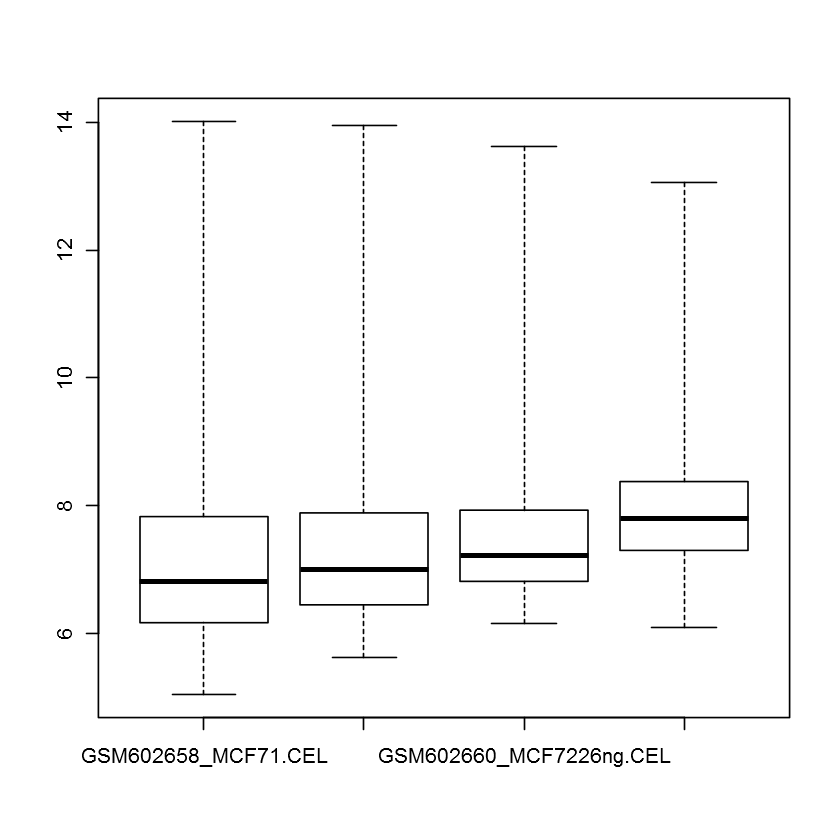

In [11]:
boxplot(myData.VSN)

5. The loess normalization uses the affy library. To do the loess normalization, use the normalize.AffyBatch.loess function as follows:

 loess 标准化使用affy库。要对loess 标准化，请使用normalize.AffyBatch。如下:

In [12]:
    myData.loess <- normalize.AffyBatch.loess(myData)

Done with 1 vs 2 in iteration 1 
Done with 1 vs 3 in iteration 1 
Done with 1 vs 4 in iteration 1 
Done with 2 vs 3 in iteration 1 
Done with 2 vs 4 in iteration 1 
Done with 3 vs 4 in iteration 1 
1 0.5319208 


6. The quantile normalization uses the affy library. To do the quantile normalization, use the normalize.AffyBatch.quantile function as follows:
 
 分位数标准化使用affy库。要做分位数标准化，使用normalize.AffyBatch。分位数函数如下：

In [13]:
myData.loess <- normalize.AffyBatch.quantiles(myData)

7. Again, plot the boxplot for these two methods in a way similar to the one shown in step5.
 
 同样，用类似于步骤5所示的方法绘制这两个方法的箱线图：

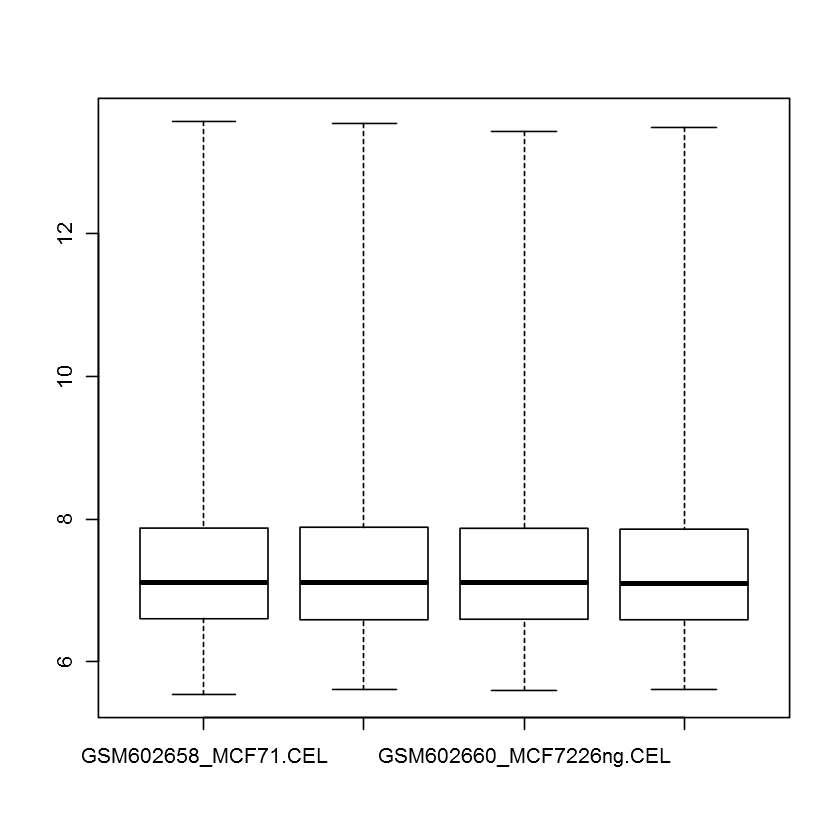

In [14]:
boxplot(myData.loess)

Normalization can also be performed using the normalize.loess and normalize.quantile function with the data matrix as the input argument if the data is only a matrix of intensities.

 执行规范化还可以用normalize.loess和normalize.quantile函数。如果数据只是一个强度矩阵，则以数据矩阵作为输入参数的分位数函数。

8. Do a second round of quality check for the normalized data and observe the effect of normalization in the same way as before using arrayQualityMetrics.

 对归一化数据进行第二轮质量检查，观察归一化效果，方法与使用arrayQualityMetrics之前相同。